In [36]:
%matplotlib inline

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
city_data_to_load = "../city_data.csv"
ride_data_to_load = "../ride_data.csv"


In [39]:
# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()
ride_data.head()

# Display the data table for preview

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [40]:
# Combine the data into a single dataset

merged_df = pd.merge(ride_data,city_data,how='left', on='city')
merged_df = merged_df.rename(columns={'city':'City','date': 'Date', 'fare': 'Fare', 'ride_id': 'ride_id', 'driver_count': 'driver_count','type':'Type'})

merged_df.head(5)

,City,Date,Fare,ride_id,driver_count,Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [60]:
average_ride_cost = round(ride_data.groupby('city')['fare'].mean(),2)
number_of_rides = ride_data.groupby('city')['fare'].count()
total_fares = ride_data.groupby('city')['fare'].sum()
clean_ride_data = pd.DataFrame({'city':city,'Fare Sales':total_fares,'Number of Rides':number_of_rides,'Average Ride':average_ride_cost})

clean_ride_data= clean_ride_data[['Number of Rides','Fare Sales','Average Ride']]

merged_df = pd.merge(clean_ride_data,city_data,how='left', on='city')
merged_df = merged_df.rename(columns={'driver_count':'Number of Drivers','type':'City'})

merged_df['Fare Sales']=pd.to_numeric(merged_df['Fare Sales'])
merged_df['Average Ride']=pd.to_numeric(merged_df['Average Ride'])


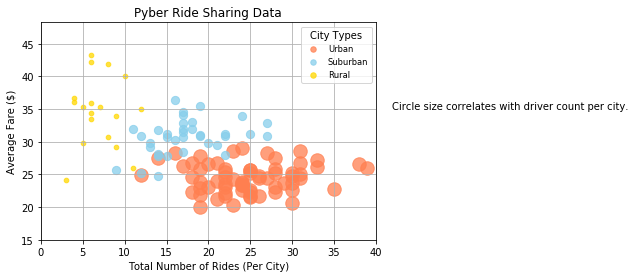

In [72]:
#create filtered df for each city type
city_urban = merged_df.loc[merged_df['City']== 'Urban']
city_suburban = merged_df.loc[merged_df['City']== 'Suburban']
city_rural = merged_df.loc[merged_df['City']== 'Rural']

# urban
x_axis = city_urban['Number of Rides']
y_axis = city_urban['Average Ride']
scalar_urban = city_urban.groupby(['City']).mean()['Number of Drivers']
urban_plot=plt.scatter(x_axis,y_axis, marker='o', facecolors = 'coral',s=scalar_urban*5, alpha= .75, label='Urban')

# suburban
x_axis_1 = city_suburban['Number of Rides']
y_axis_1 = city_suburban['Average Ride']
scalar_suburban = city_suburban.groupby(['City']).mean()['Number of Drivers']
suburban_plot=plt.scatter(x_axis_1,y_axis_1, marker='o', facecolors = 'skyblue',s=scalar_suburban*5, alpha= .75,label='Suburban')

# rural
x_axis_2 = city_rural['Number of Rides']
y_axis_2 = city_rural['Average Ride']
scalar_rural = city_rural.groupby(['City']).mean()['Number of Drivers']
rural_plot =plt.scatter(x_axis_2,y_axis_2, marker='o', facecolors = 'gold',s=scalar_rural*5, alpha= .75, label='Rural')

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim(15,max(merged_df['Average Ride']) + 5)
plt.xlim(0,max(merged_df['Number of Rides']) + 1)
legend = plt.legend(loc = "best", fontsize= 'small', mode= 'Expanded', numpoints =1, 
                    scatterpoints=1, title='City Types', labelspacing = .5)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.text(42,35, "Circle size correlates with driver count per city.")

plt.grid(True)
plt.savefig("../PyberBubble.png")
plt.show()

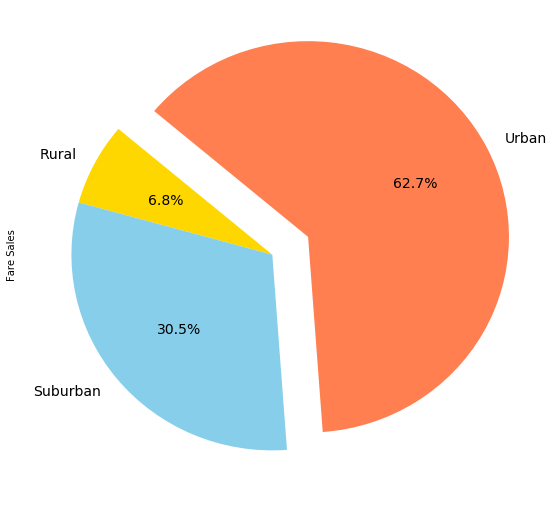

In [82]:
# percentage of total fares by city types
total_fares_by_city = merged_df.groupby('City')['Fare Sales'].sum()

colors = ['gold','skyblue','coral']
explode = (0,0,.2)
piechart_percentage_totalridesbycity = total_fares_by_city.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14, startangle=140)

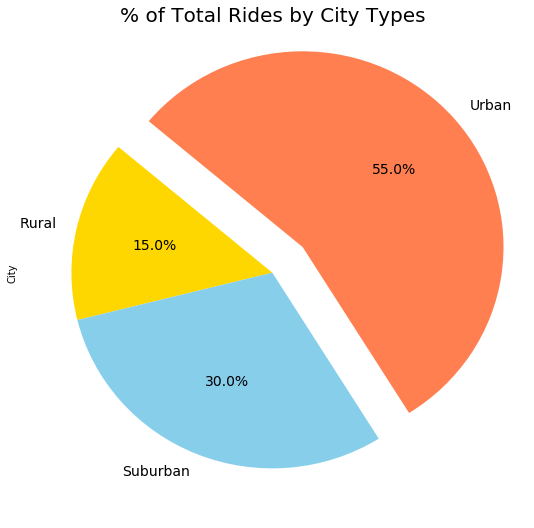

In [83]:
#%  of total rides by city types
type_group = merged_df.groupby('City')
count_groupbyrides = type_group['City'].count()
count_groupbyrides
colors = ['gold','skyblue','coral']
explode = (0,0,.2)
piechart_percentage_totalrides = count_groupbyrides.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14, startangle=140)

piechart_percentage_totalrides.set_title("% of Total Rides by City Types", fontsize = 20)
plt.savefig("../TotalRidesByCity.png")
plt.show()

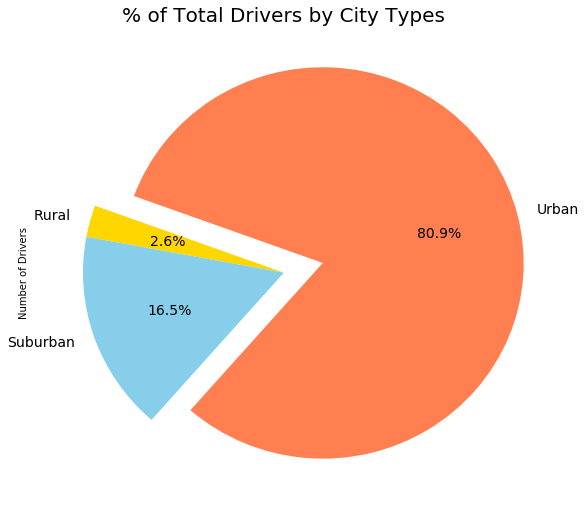

In [85]:

total_drivers_by_citytype = merged_df.groupby('City')['Number of Drivers'].sum()
colors = ['gold','skyblue','coral']
explode = (0,0,.2)
piechart_percentage_totaldrivers_by_city = total_drivers_by_citytype.plot(kind = 'pie', colors=colors, figsize=(9,9), autopct='%1.1f%%',
                                                         explode =explode, fontsize= 14, startangle=160)

piechart_percentage_totaldrivers_by_city.set_title("% of Total Drivers by City Types", fontsize = 20)
plt.savefig("../TotalDriversByCity.png")
plt.show()
